# Identifying Fake Instagram Accounts

## ■ 필요한 라이브러리 import

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## ■데이터 불러오기 및 데이터 확인

In [2]:
df = pd.read_csv('./final-v1.csv')

In [3]:
print('dimensions:')
print(df.shape)

dimensions:
(785, 13)


In [4]:
print('Information:')
df.info()

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edge_followed_by      785 non-null    float64
 1   edge_follow           785 non-null    float64
 2   username_length       785 non-null    int64  
 3   username_has_number   785 non-null    int64  
 4   full_name_has_number  785 non-null    int64  
 5   full_name_length      785 non-null    int64  
 6   is_private            785 non-null    int64  
 7   is_joined_recently    785 non-null    int64  
 8   has_channel           785 non-null    int64  
 9   is_business_account   785 non-null    int64  
 10  has_guides            785 non-null    int64  
 11  has_external_url      785 non-null    int64  
 12  is_fake               785 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 79.9 KB


In [5]:
print(df.apply(lambda col: col.unique())) 

edge_followed_by        [0.001, 0.0, 0.002, 0.005, 0.008, 0.003, 0.006...
edge_follow             [0.257, 0.958, 0.253, 0.977, 0.321, 0.917, 0.0...
username_length         [13, 9, 12, 10, 11, 15, 7, 8, 17, 14, 20, 18, ...
username_has_number                                                [1, 0]
full_name_has_number                                               [1, 0]
full_name_length        [13, 0, 11, 9, 4, 6, 1, 16, 7, 5, 15, 2, 3, 12...
is_private                                                         [0, 1]
is_joined_recently                                                 [0, 1]
has_channel                                                           [0]
is_business_account                                                [0, 1]
has_guides                                                         [0, 1]
has_external_url                                                   [0, 1]
is_fake                                                            [1, 0]
dtype: object


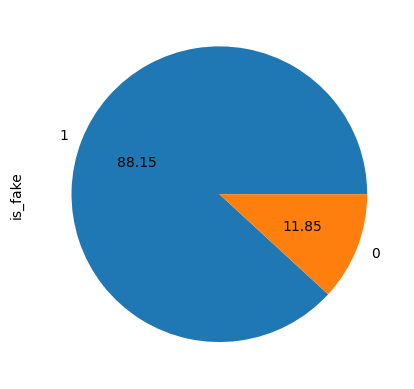

In [6]:
df['is_fake'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

In [7]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


## ■ Data Split

In [8]:
X = df.loc[:,'edge_followed_by':'has_external_url']
y = df['is_fake']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, shuffle=True, random_state=42)

In [9]:
X_train.head()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url
212,0.0,0.049,16,1,0,25,0,1,0,0,0,0
584,0.0,0.194,11,1,0,0,0,1,0,0,0,0
425,0.0,0.252,7,1,0,0,0,0,0,0,0,0
24,0.0,0.133,11,1,0,7,1,1,0,0,0,0
139,0.0,0.113,14,0,0,2,1,1,0,0,0,0


In [10]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of test_y: {} \n'.format(y_train.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_test==0)))

Before OverSampling, the shape of train_X: (549, 12)
Before OverSampling, the shape of test_y: (549,) 

Before OverSampling, counts of label '1': 484
Before OverSampling, counts of label '0': 28


## ■ Data OverSampling

In [11]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# 모델설정
sm = SMOTE(sampling_strategy='auto')

# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)
# X_resampled_df = pd.DataFrame(X_resampled, columns=X_train.columns)

In [12]:
print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

After OverSampling, the shape of train_X: (968, 12)
After OverSampling, the shape of train_y: (968,) 

After OverSampling, counts of label '1': 484
After OverSampling, counts of label '0': 484


In [13]:
y_resampled

0      1
1      1
2      1
3      1
4      1
      ..
963    0
964    0
965    0
966    0
967    0
Name: is_fake, Length: 968, dtype: int64

In [14]:
X_resampled

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url
0,0.000000,0.049000,16,1,0,25,0,1,0,0,0,0
1,0.000000,0.194000,11,1,0,0,0,1,0,0,0,0
2,0.000000,0.252000,7,1,0,0,0,0,0,0,0,0
3,0.000000,0.133000,11,1,0,7,1,1,0,0,0,0
4,0.000000,0.113000,14,0,0,2,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.018959,0.353984,17,0,0,7,0,0,0,0,0,0
964,0.000894,0.113831,9,1,0,9,1,0,0,0,0,0
965,0.033172,0.255813,17,0,0,8,0,0,0,0,0,0
966,0.000000,0.060933,10,0,0,0,1,0,0,0,0,0


## ■ Binary Feature 시각화

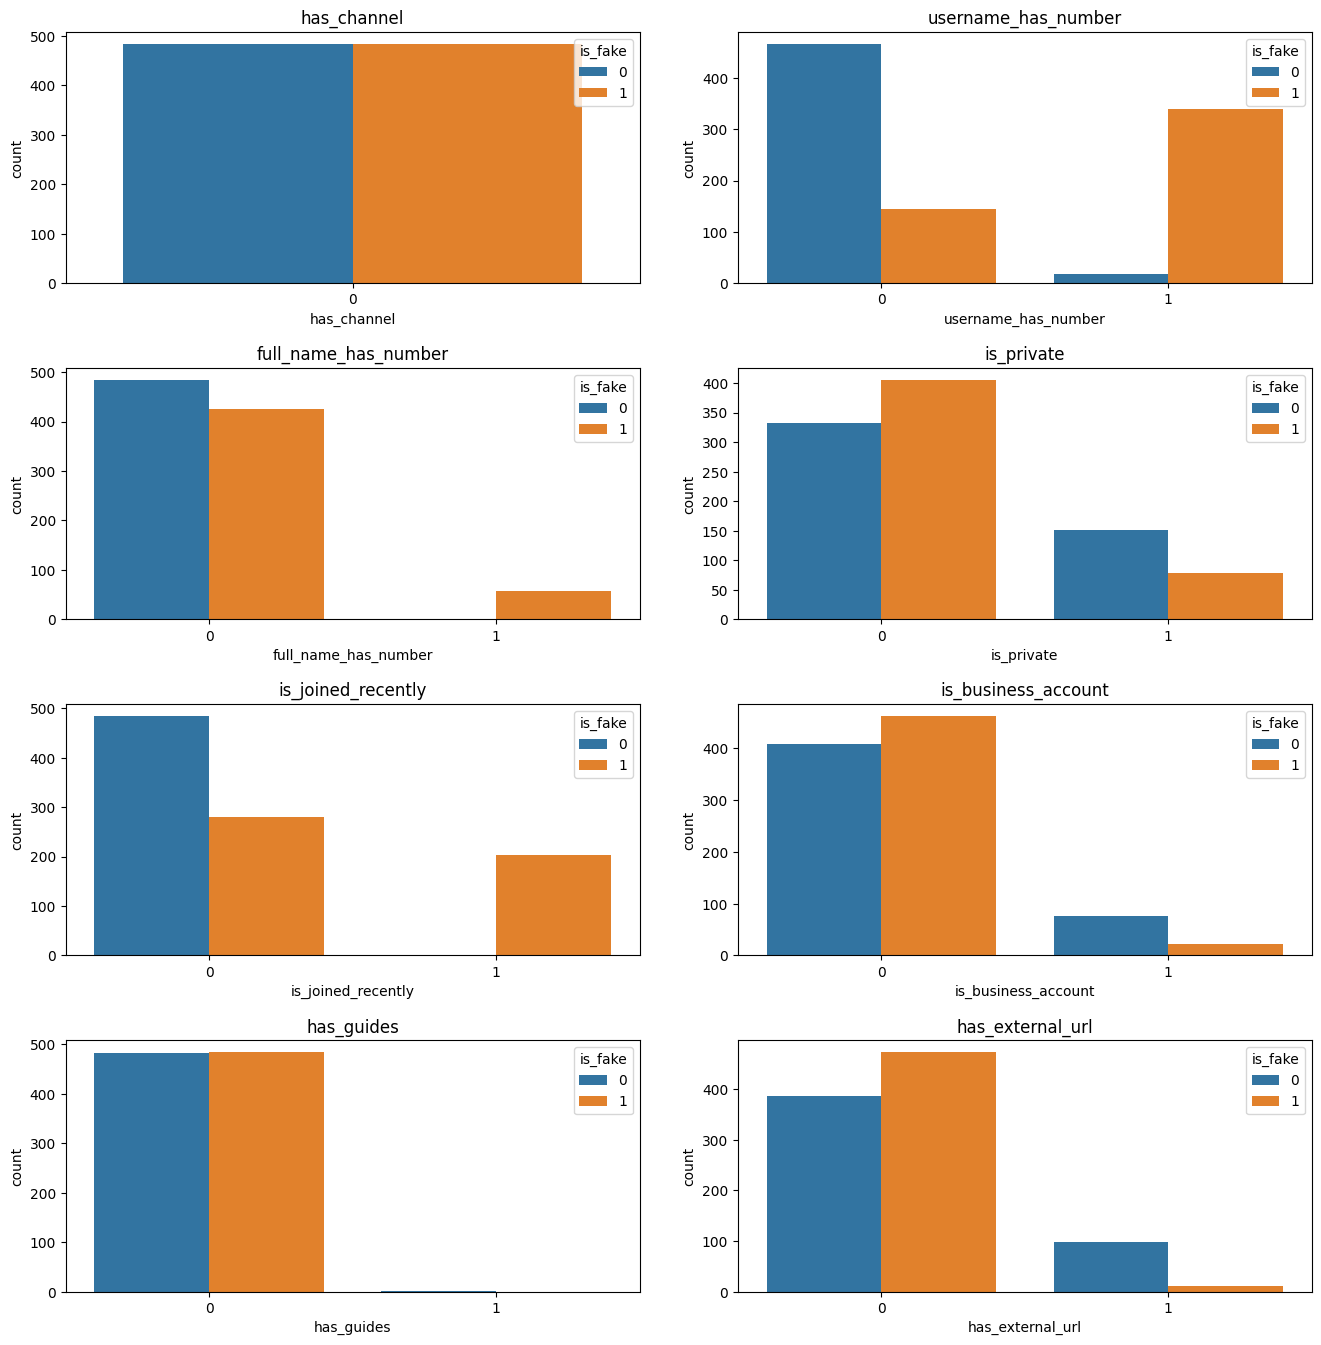

In [15]:
def binary_visualize(df, features):
    # 서브플롯의 개수 설정 (4x2)
    fig, axes = plt.subplots(4,2, figsize=(14, 14))
    fig.tight_layout(pad=4.0)

    # 각 기능에 대해 그래프 그리기
    for i, feature in enumerate(features):
        row = i // 2  # 행 인덱스 계산
        col = i % 2   # 열 인덱스 계산
        ax = axes[row, col]

        # 서브플롯에 그래프 그리기
        sns.countplot(data=df, x=feature, hue=y_resampled, ax=ax)
        ax.set_title(feature)

    plt.show()

# 함수 사용 예시
features = ['has_channel','username_has_number','full_name_has_number','is_private','is_joined_recently','is_business_account','has_guides','has_external_url']
binary_visualize(X_resampled, features)

## ■ "has_channel"삭제

In [16]:
X_resampled.drop(["has_channel"],axis=1,inplace=True)

In [17]:
df = X_resampled.copy()
label = y_resampled.copy()
print(type(label))
# label = pd.DataFrame
df['is_faked'] = label

<class 'pandas.core.series.Series'>


In [18]:
df

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,is_business_account,has_guides,has_external_url,is_faked
0,0.000000,0.049000,16,1,0,25,0,1,0,0,0,1
1,0.000000,0.194000,11,1,0,0,0,1,0,0,0,1
2,0.000000,0.252000,7,1,0,0,0,0,0,0,0,1
3,0.000000,0.133000,11,1,0,7,1,1,0,0,0,1
4,0.000000,0.113000,14,0,0,2,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.018959,0.353984,17,0,0,7,0,0,0,0,0,0
964,0.000894,0.113831,9,1,0,9,1,0,0,0,0,0
965,0.033172,0.255813,17,0,0,8,0,0,0,0,0,0
966,0.000000,0.060933,10,0,0,0,1,0,0,0,0,0


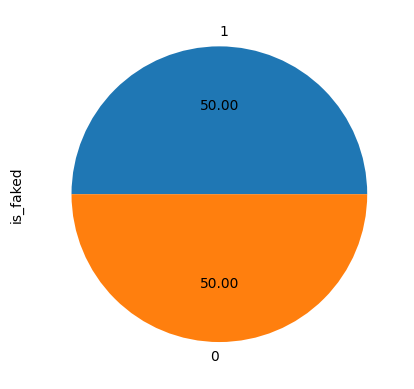

In [19]:
df['is_faked'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

# ■ 나머지 피쳐 시각화

<AxesSubplot: xlabel='is_faked', ylabel='edge_follow'>

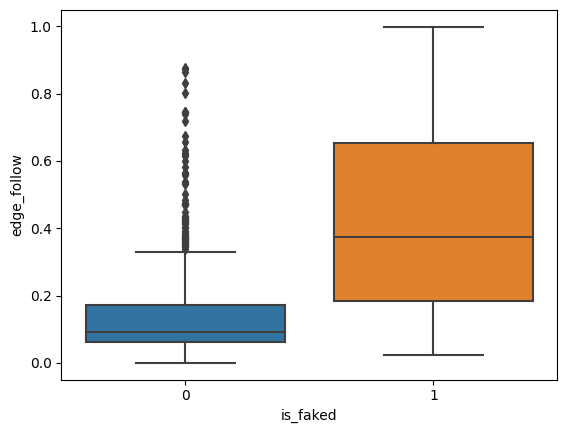

In [20]:
sns.boxplot(x="is_faked",y="edge_follow", data = df)

<AxesSubplot: xlabel='is_faked', ylabel='edge_followed_by'>

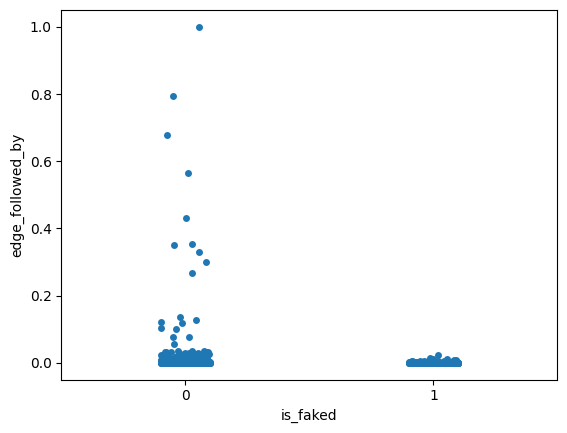

In [21]:
sns.stripplot(x="is_faked",y="edge_followed_by", data = df, jitter=True)

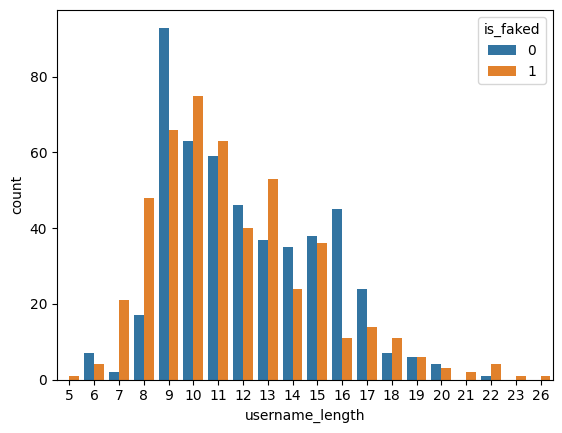

In [22]:
sns.countplot(x='username_length', data=df, hue='is_faked')
plt.show()

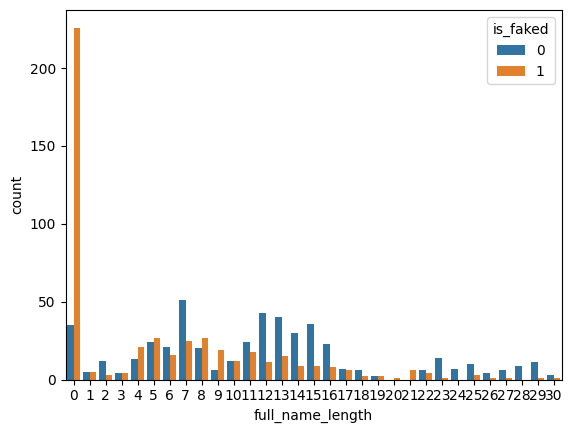

In [23]:
sns.countplot(x='full_name_length', data=df, hue='is_faked')
plt.show()

# ■ 정규화

In [24]:
corr = df.corr()
corr

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,is_business_account,has_guides,has_external_url,is_faked
edge_followed_by,1.000000,-0.094004,-0.101220,-0.105659,-0.035473,0.225788,-0.078024,-0.073655,0.030122,-0.001838,0.181454,-0.135695
edge_follow,-0.094004,1.000000,-0.064689,0.390273,0.180753,-0.211353,-0.090936,0.103453,-0.054024,0.015552,-0.151544,0.511208
username_length,-0.101220,-0.064689,1.000000,-0.134369,-0.034101,0.163501,0.005322,-0.105049,0.030345,-0.008735,-0.006864,-0.086394
username_has_number,-0.105659,0.390273,-0.134369,1.000000,0.294192,-0.372344,-0.161713,0.366263,-0.206860,-0.024581,-0.230075,0.687306
full_name_has_number,-0.035473,0.180753,-0.034101,0.294192,1.000000,0.081505,-0.069858,0.147038,-0.084732,-0.008119,-0.061815,0.252460
full_name_length,0.225788,-0.211353,0.163501,-0.372344,0.081505,1.000000,-0.145208,-0.291666,0.420790,0.090246,0.321812,-0.428171
is_private,-0.078024,-0.090936,0.005322,-0.161713,-0.069858,-0.145208,1.000000,-0.099133,-0.187900,-0.018004,-0.098324,-0.176923
is_joined_recently,-0.073655,0.103453,-0.105049,0.366263,0.147038,-0.291666,-0.099133,1.000000,-0.156634,-0.016617,-0.158982,0.516736
is_business_account,0.030122,-0.054024,0.030345,-0.206860,-0.084732,0.420790,-0.187900,-0.156634,1.000000,0.095815,0.196520,-0.184936
has_guides,-0.001838,0.015552,-0.008735,-0.024581,-0.008119,0.090246,-0.018004,-0.016617,0.095815,1.000000,0.090745,-0.032158


<AxesSubplot: >

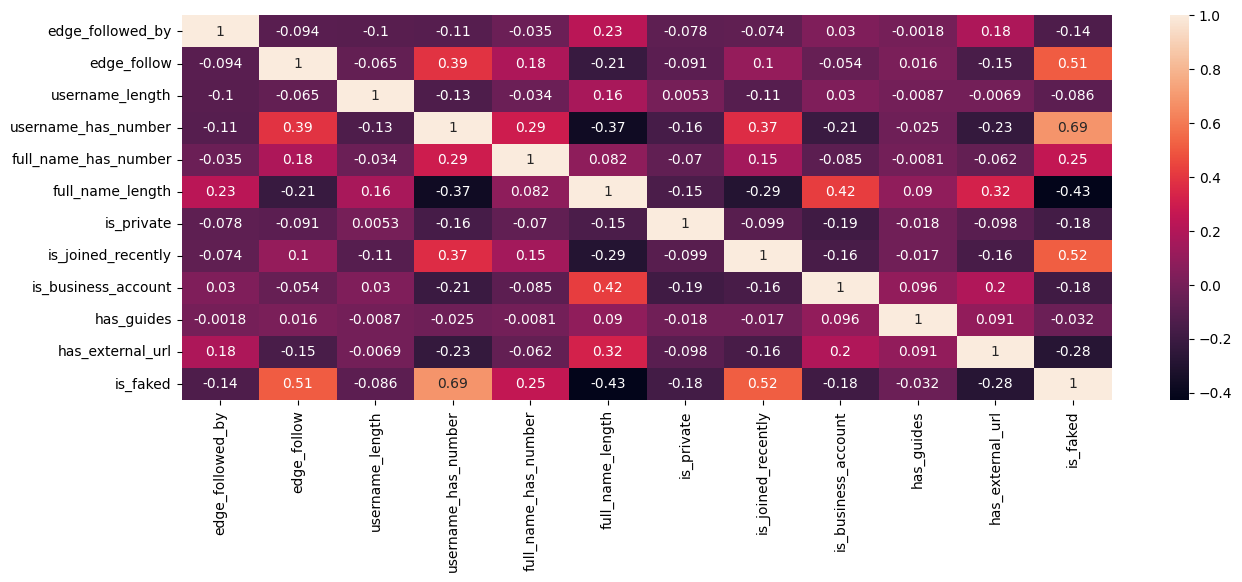

In [25]:
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True)

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ['username_length','full_name_length']
df_scaled = scaler.fit_transform(df[cols_to_scale])
df['username_length'],df['full_name_length'] = df_scaled[:,0],df_scaled[:,1]

In [27]:
print(df.apply(lambda col: col.unique())) 

edge_followed_by        [0.0, 0.001, 0.003, 0.005, 0.002, 0.036, 0.004...
edge_follow             [0.049, 0.194, 0.252, 0.133, 0.113, 0.876, 0.4...
username_length         [0.5238095238095237, 0.28571428571428564, 0.09...
username_has_number                                                [1, 0]
full_name_has_number                                               [0, 1]
full_name_length        [0.8333333333333334, 0.0, 0.23333333333333334,...
is_private                                                         [0, 1]
is_joined_recently                                                 [1, 0]
is_business_account                                                [0, 1]
has_guides                                                         [0, 1]
has_external_url                                                   [0, 1]
is_faked                                                           [1, 0]
dtype: object


In [28]:
df

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,is_business_account,has_guides,has_external_url,is_faked
0,0.000000,0.049000,0.523810,1,0,0.833333,0,1,0,0,0,1
1,0.000000,0.194000,0.285714,1,0,0.000000,0,1,0,0,0,1
2,0.000000,0.252000,0.095238,1,0,0.000000,0,0,0,0,0,1
3,0.000000,0.133000,0.285714,1,0,0.233333,1,1,0,0,0,1
4,0.000000,0.113000,0.428571,0,0,0.066667,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.018959,0.353984,0.571429,0,0,0.233333,0,0,0,0,0,0
964,0.000894,0.113831,0.190476,1,0,0.300000,1,0,0,0,0,0
965,0.033172,0.255813,0.571429,0,0,0.266667,0,0,0,0,0,0
966,0.000000,0.060933,0.238095,0,0,0.000000,1,0,0,0,0,0


In [29]:
corr = df.corr()
corr

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,is_business_account,has_guides,has_external_url,is_faked
edge_followed_by,1.000000,-0.094004,-0.101220,-0.105659,-0.035473,0.225788,-0.078024,-0.073655,0.030122,-0.001838,0.181454,-0.135695
edge_follow,-0.094004,1.000000,-0.064689,0.390273,0.180753,-0.211353,-0.090936,0.103453,-0.054024,0.015552,-0.151544,0.511208
username_length,-0.101220,-0.064689,1.000000,-0.134369,-0.034101,0.163501,0.005322,-0.105049,0.030345,-0.008735,-0.006864,-0.086394
username_has_number,-0.105659,0.390273,-0.134369,1.000000,0.294192,-0.372344,-0.161713,0.366263,-0.206860,-0.024581,-0.230075,0.687306
full_name_has_number,-0.035473,0.180753,-0.034101,0.294192,1.000000,0.081505,-0.069858,0.147038,-0.084732,-0.008119,-0.061815,0.252460
full_name_length,0.225788,-0.211353,0.163501,-0.372344,0.081505,1.000000,-0.145208,-0.291666,0.420790,0.090246,0.321812,-0.428171
is_private,-0.078024,-0.090936,0.005322,-0.161713,-0.069858,-0.145208,1.000000,-0.099133,-0.187900,-0.018004,-0.098324,-0.176923
is_joined_recently,-0.073655,0.103453,-0.105049,0.366263,0.147038,-0.291666,-0.099133,1.000000,-0.156634,-0.016617,-0.158982,0.516736
is_business_account,0.030122,-0.054024,0.030345,-0.206860,-0.084732,0.420790,-0.187900,-0.156634,1.000000,0.095815,0.196520,-0.184936
has_guides,-0.001838,0.015552,-0.008735,-0.024581,-0.008119,0.090246,-0.018004,-0.016617,0.095815,1.000000,0.090745,-0.032158


<AxesSubplot: >

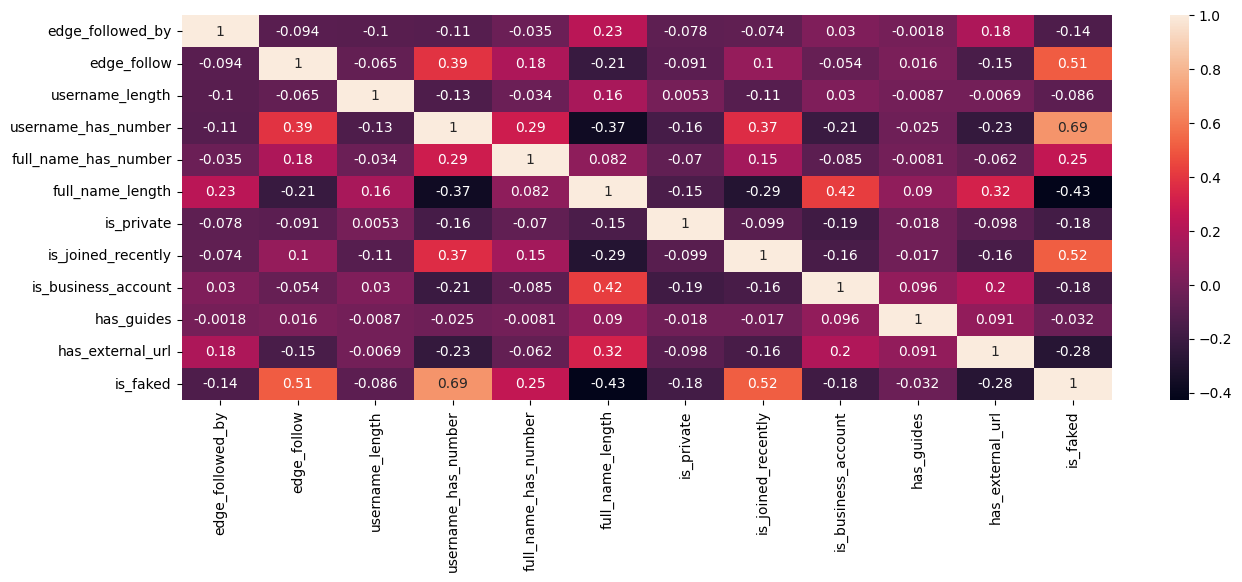

In [30]:
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True)

## ■ Training

In [31]:
label = df['is_faked']
df.drop(['is_faked'],axis=1,inplace=True)

## SVM

In [32]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

# SVM, kernel = 'rbf'로 비선형분리 진행
 
svm_clf =svm.SVC(kernel = 'rbf')
svm_clf.fit(df,label)

SVC()

## DNN

In [33]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation='relu'),
    keras.layers.Dense(11, activation='relu'),
    keras.layers.Dense(11, activation='relu'),
    keras.layers.Dense(2, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy'
)
model.fit(df,label,epochs=50)

Epoch 1/50
31/31 [==============================] - 0s 1ms/step - loss: 0.6908
Epoch 2/50
31/31 [==============================] - 0s 1ms/step - loss: 0.6646
Epoch 3/50
31/31 [==============================] - 0s 933us/step - loss: 0.6154
Epoch 4/50
31/31 [==============================] - 0s 967us/step - loss: 0.5335
Epoch 5/50
31/31 [==============================] - 0s 967us/step - loss: 0.4384
Epoch 6/50
31/31 [==============================] - 0s 933us/step - loss: 0.3558
Epoch 7/50
31/31 [==============================] - 0s 967us/step - loss: 0.3019
Epoch 8/50
31/31 [==============================] - 0s 933us/step - loss: 0.2714
Epoch 9/50
31/31 [==============================] - 0s 1ms/step - loss: 0.2550
Epoch 10/50
31/31 [==============================] - 0s 967us/step - loss: 0.2447
Epoch 11/50
31/31 [==============================] - 0s 967us/step - loss: 0.2344
Epoch 12/50
31/31 [==============================] - 0s 967us/step - loss: 0.2272
Epoch 13/50
31/31 [============

## ■ Test

In [34]:
X_test.drop(["has_channel"],axis=1,inplace=True)

In [35]:
df_scaled = scaler.fit_transform(X_test[cols_to_scale])
X_test['username_length'],X_test['full_name_length'] = df_scaled[:,0],df_scaled[:,1]

In [36]:
preds_svm = svm_clf.predict(X_test)
preds_dnn = model.predict(X_test)

8/8 [==============================] - 0s 857us/step


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# 성능확인(SVM)

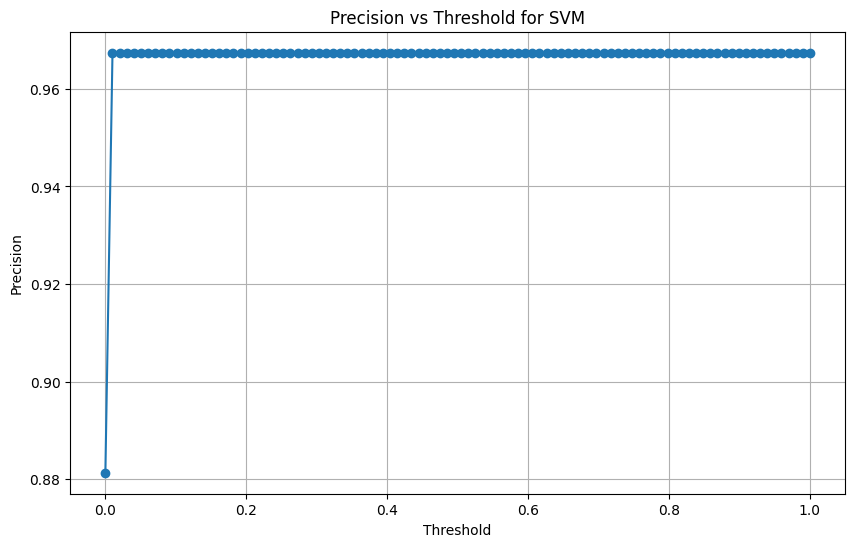

In [38]:
thresholds = np.linspace(0, 1, 100)
# accuracies = []
precisions = []
for threshold in thresholds:
    predicted_classes = np.where(preds_svm >= threshold, 1, 0)
    accuracy = accuracy_score(y_test, predicted_classes)
    precision = precision_score(y_test, predicted_classes)
#     accuracies.append(accuracy)
    precisions.append(precision)

# 임계값에 따른 정확도 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, marker='o')
plt.title('Precision vs Threshold for SVM')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

Accuracy: 0.847457627118644
Precision: 0.967391304347826
Recall: 0.8557692307692307
F1 Score: 0.9081632653061225


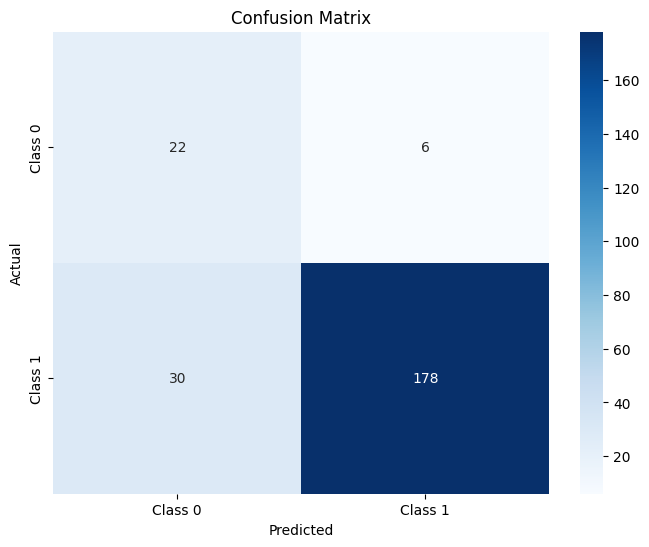

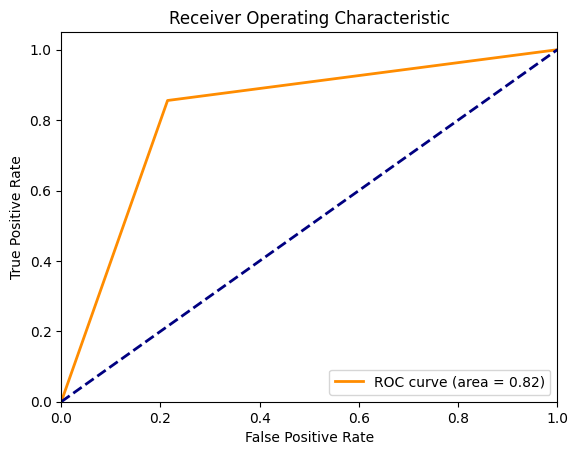

In [39]:
# 임계값 설정 및 예측 클래스 결정
threshold = 0.5
predicted_classes = np.where(preds_svm >= threshold, 1, 0)

# 성능 지표 계산
accuracy = accuracy_score(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix 계산 및 시각화
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# ROC 커브 및 AUC 계산
fpr, tpr, thresholds = roc_curve(y_test, preds_svm)
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 성능확인(DNN)

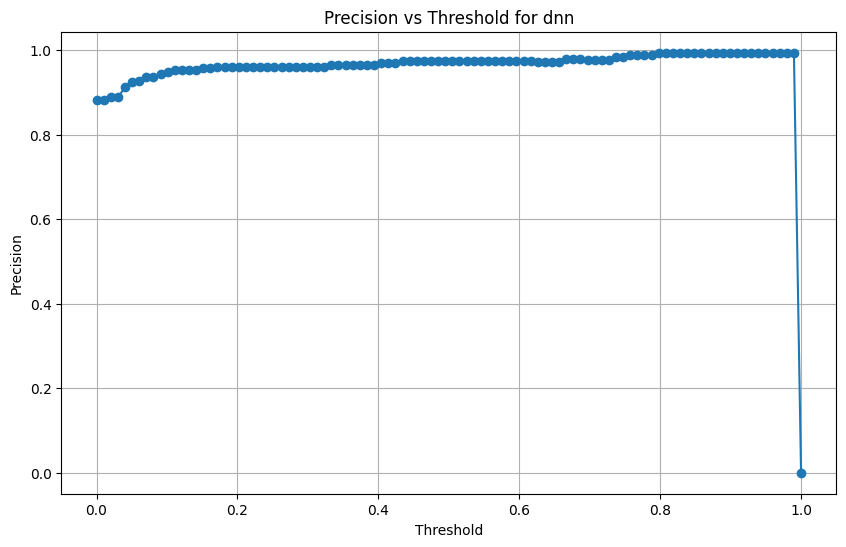

In [40]:
thresholds = np.linspace(0, 1, 100)
# accuracies = []
precisions = []
for threshold in thresholds:
    predicted_classes = np.where(preds_dnn[:, 1] >= threshold, 1, 0)
    accuracy = accuracy_score(y_test, predicted_classes)
    precision = precision_score(y_test, predicted_classes)
#     accuracies.append(accuracy)
    precisions.append(precision)

# 임계값에 따른 정확도 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, marker='o')
plt.title('Precision vs Threshold for dnn')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

Accuracy: 0.8898305084745762
Precision: 0.9739583333333334
Recall: 0.8990384615384616
F1 Score: 0.935


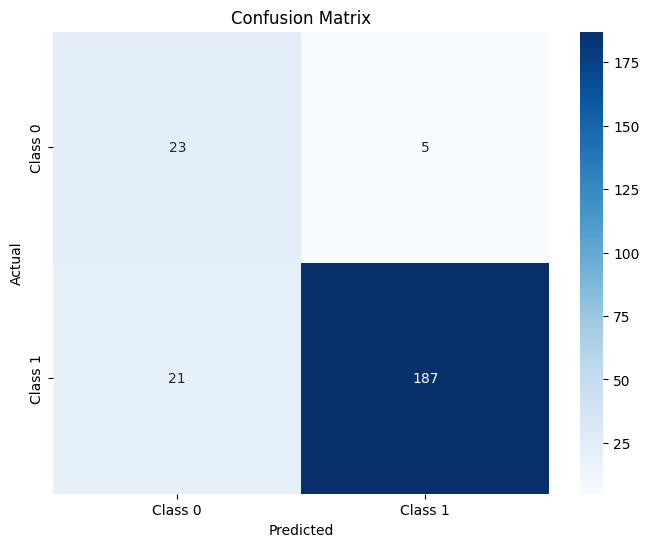

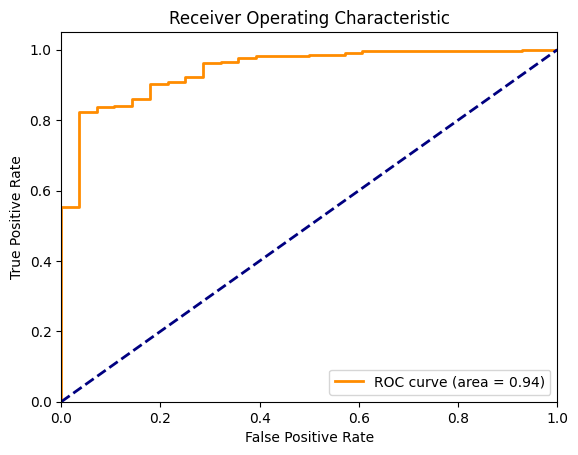

In [41]:
# 임계값 설정 및 예측 클래스 결정
threshold = 0.5
predicted_classes = np.where(preds_dnn[:, 1] >= threshold, 1, 0)

# 성능 지표 계산
accuracy = accuracy_score(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix 계산 및 시각화
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# ROC 커브 및 AUC 계산
fpr, tpr, thresholds = roc_curve(y_test, preds_dnn[:, 1])
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# oversample 없이 훈련 및 테스트

In [42]:
df2 = pd.read_csv('./final-v1.csv')

In [43]:
X = df2.loc[:,'edge_followed_by':'has_external_url']
y = df2['is_fake']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, shuffle=True, random_state=42)

In [44]:
X_train.drop(["has_channel"],axis=1,inplace=True)
X_test.drop(["has_channel"],axis=1,inplace=True)

In [45]:
scaler = MinMaxScaler()
cols_to_scale = ['username_length','full_name_length']
X_train_scaled = scaler.fit_transform(X_train[cols_to_scale])
X_train['username_length'],X_train['full_name_length'] = X_train_scaled[:,0],X_train_scaled[:,1]

X_test_scaled = scaler.fit_transform(X_test[cols_to_scale])
X_test['username_length'],X_test['full_name_length'] = X_test_scaled[:,0],X_test_scaled[:,1]

In [46]:
X_train.head()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,is_business_account,has_guides,has_external_url
212,0.0,0.049,0.523810,1,0,0.833333,0,1,0,0,0
584,0.0,0.194,0.285714,1,0,0.000000,0,1,0,0,0
425,0.0,0.252,0.095238,1,0,0.000000,0,0,0,0,0
24,0.0,0.133,0.285714,1,0,0.233333,1,1,0,0,0
139,0.0,0.113,0.428571,0,0,0.066667,1,1,0,0,0


In [47]:
#svm
svm_clf =svm.SVC(kernel = 'rbf')
svm_clf.fit(X_train,y_train)

SVC()

In [48]:
#dnn
model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation='relu'),
    keras.layers.Dense(11, activation='relu'),
    keras.layers.Dense(11, activation='relu'),
    keras.layers.Dense(2, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy'
)
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5767
Epoch 2/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5077
Epoch 3/50
18/18 [==============================] - 0s 941us/step - loss: 0.4412
Epoch 4/50
18/18 [==============================] - 0s 1ms/step - loss: 0.3851
Epoch 5/50
18/18 [==============================] - 0s 941us/step - loss: 0.3464
Epoch 6/50
18/18 [==============================] - 0s 941us/step - loss: 0.3183
Epoch 7/50
18/18 [==============================] - 0s 1000us/step - loss: 0.2950
Epoch 8/50
18/18 [==============================] - 0s 1000us/step - loss: 0.2760
Epoch 9/50
18/18 [==============================] - 0s 941us/step - loss: 0.2578
Epoch 10/50
18/18 [==============================] - 0s 1000us/step - loss: 0.2396
Epoch 11/50
18/18 [==============================] - 0s 941us/step - loss: 0.2223
Epoch 12/50
18/18 [==============================] - 0s 1000us/step - loss: 0.2062
Epoch 13/50
18/18 [========

In [49]:
preds_svm = svm_clf.predict(X_test)
preds_dnn = model.predict(X_test)

8/8 [==============================] - 0s 857us/step


In [50]:
# 임계값 설정 및 예측 클래스 결정
threshold = 0.5
predicted_classes = np.where(preds_svm >= threshold, 1, 0)

# 성능 지표 계산
accuracy = accuracy_score(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9279661016949152
Precision: 0.9400921658986175
Recall: 0.9807692307692307
F1 Score: 0.96


In [51]:
# 임계값 설정 및 예측 클래스 결정
threshold = 0.5
predicted_classes = np.where(preds_dnn[:, 1] >= threshold, 1, 0)

# 성능 지표 계산
accuracy = accuracy_score(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9279661016949152
Precision: 0.95260663507109
Recall: 0.9663461538461539
F1 Score: 0.9594272076372314
